In [4]:
import mlrose_hiive
import numpy as np
import time
import matplotlib.pyplot as plt


In [5]:
# Define a function to solve TSP using different algorithms and collect metrics
def solve_tsp(algorithm, problem, max_attempts=10, max_iters=np.inf):
    start_time = time.time()
    best_state, best_fitness, curve = algorithm(problem, max_attempts=max_attempts, max_iters=max_iters, curve=True, random_state=1)
    end_time = time.time()
    time_taken = end_time - start_time
    function_evaluations = len(curve)
    evaluations_per_second = function_evaluations / time_taken if time_taken > 0 else 0
    return best_fitness, time_taken, function_evaluations, evaluations_per_second, curve

In [6]:
# Generate more complex coordinates
np.random.seed(0)  # For reproducibility
coords = [(np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(20)]  # 20 random coordinates

In [7]:
# Initialize the TSP problem
fitness_coords = mlrose_hiive.TravellingSales(coords=coords)
problem = mlrose_hiive.TSPOpt(length=len(coords), fitness_fn=fitness_coords, maximize=False)

In [8]:
# Define algorithms
algorithms = {
    'Random Hill Climb': mlrose_hiive.random_hill_climb,
    'Genetic Algorithm': mlrose_hiive.genetic_alg,
    'MIMIC': mlrose_hiive.mimic,
    'Simulated Annealing': mlrose_hiive.simulated_annealing
}

results = {}

In [9]:
# Solve TSP using each algorithm and collect results
for algo_name, algo in algorithms.items():
    results[algo_name] = solve_tsp(algo, problem)

Random Hill Climb: Best Fitness: 580.2928388642224, Time Taken: 0.01057887077331543s, Function Evaluations: 41, Evaluations/Second: 3875.649951544928
Genetic Algorithm: Best Fitness: 345.2808560945127, Time Taken: 2.2901082038879395s, Function Evaluations: 114, Evaluations/Second: 49.77930728620642
MIMIC: Best Fitness: 652.3743113569111, Time Taken: 3.645542860031128s, Function Evaluations: 19, Evaluations/Second: 5.211843812978176
Simulated Annealing: Best Fitness: 528.641155641346, Time Taken: 0.0026988983154296875s, Function Evaluations: 58, Evaluations/Second: 21490.250176678444


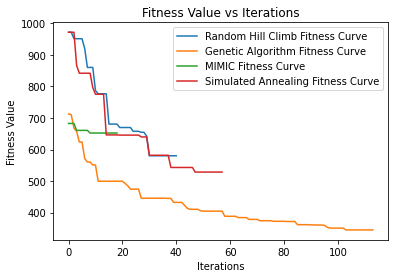

In [14]:
# Compare performances
for algo_name, result in results.items():
    print(f"{algo_name}: Best Fitness: {result[0]}, Time Taken: {result[1]}s, Function Evaluations: {result[2]}, Evaluations/Second: {result[3]}")
    plt.plot(result[4][:,0], label=f"{algo_name} Fitness Curve")
    
plt.xlabel("Iterations")
plt.ylabel("Fitness Value")
plt.title("Fitness Value vs Iterations")
plt.legend()
plt.show()